# Author : Karan Shingde
## Role : Data Scientist and Business Analyst
### Intern at TSF-GRIP October 2021 batch

# Exploratory Data Analysis of IPL Dataset

- We have two datasets of IPL:

1. IPL Ball by Ball data from 2008 to 2020
2. IPL Matches 2008 to 2020


## Our task is to analyze and visualize the data

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Packages for predictions

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Data loading and data analysis

In [4]:
#ball by ball data
byb = pd.read_csv('ballByball.csv')
matches = pd.read_csv('matches.csv')

In [5]:
byb.head() # top records of ball by ball dataset

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
matches.head() # top records of matches dataset

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
#let's check columns of these datasets
print(byb.columns)
print('-'*254)
print(matches.columns)

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [8]:
# Information of both datasets
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Method have a lot of null values lets check what are the unique value does method have.

- So it turns our in 19 matches outcome was decided by D/L method.


The Duckworth–Lewis–Stern method (DLS) is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances. The method was devised by two English statisticians, Frank Duckworth and Tony Lewis, and was formerly known as the Duckworth–Lewis method (D/L).[1] It was introduced in 1997, and adopted officially by the ICC in 1999.

In [10]:
# checking match win total null values
matches['winner'].isnull().sum()

4

In [11]:
# Checking null match values
# I Checked the internet these matches were called off
# So we could simply removes these columns

matches[matches['winner'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [12]:
# tie matches
matches[matches['result']=='tie']

# see eliminator column is having 'Y'

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [13]:
matches.method.unique()

array([nan, 'D/L'], dtype=object)

In [14]:
# check the number of match each team won
matches['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**Mumbai Indians** and **Chennai Super Kings** are the only teams who won more than 100 matches in IPL

In [15]:
matches['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [16]:
matches['team2'].value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team2, dtype: int64

- We need to merge Delhi capitals and Delhi DareDevil into Delhi Capital as it has been renamed to Delhi Capital.

- There is problem with Rising Pune Supergiant as 's' is added at some places.

# Data Analysis and Visualization

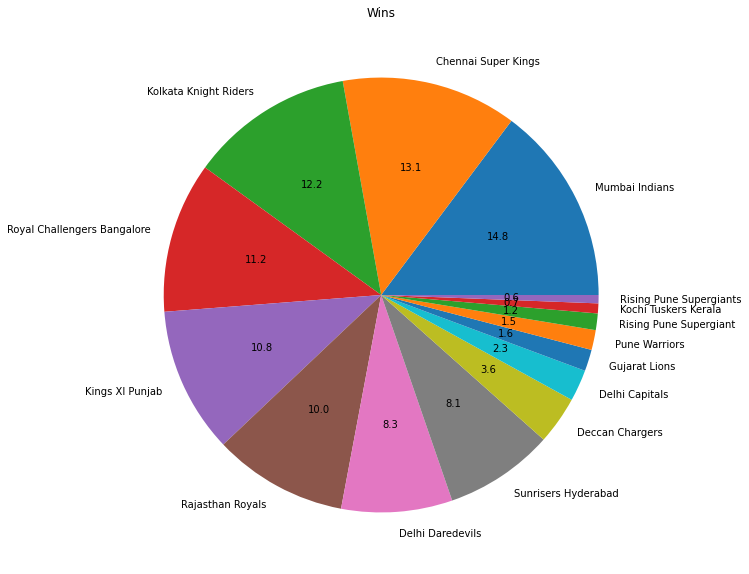

In [17]:
# Most wins in IPL
temp = pd.DataFrame({'Winner':matches['winner']})
count_win = temp.value_counts()
# Count_wins is a dictionary; with key being Mumbai Indian and all

# creating label : containing team's name

labels = [I[0] for I in count_win.keys()]

bar, ax = plt.subplots(figsize=(10,10))
ax = plt.pie(x=count_win, autopct="%.1f", labels=labels)
plt.title('Wins')
plt.show()

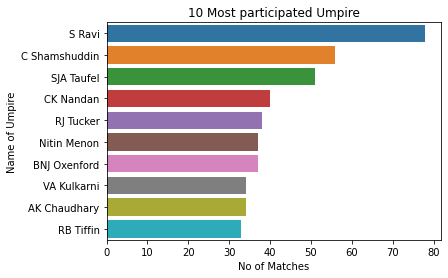

In [19]:
# Top 10 umpire1 & 2 value count

sns.barplot(x=matches['umpire1'].value_counts().head(10).values,
           y=matches['umpire2'].value_counts().head(10).index,
           data = matches)
plt.xlabel('No of Matches')
plt.ylabel('Name of Umpire')
plt.title('10 Most participated Umpire')
plt.show()

In [22]:
matches['Season']= pd.DatetimeIndex(matches['date']).year
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [25]:
# Visualize number of matches player in each season and compare all seasons
matches_per_season = matches.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
# {'id':'matches'} : Dictionary to convert id columns to mathces 
matches_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


- From above result we can say that in 2013 most number of matches has been played

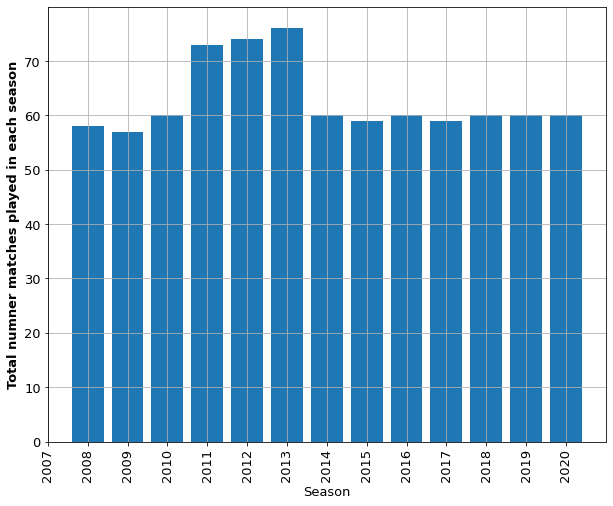

In [30]:
# Let's visualize the above result
x = matches_per_season.Season
y = matches_per_season.matches
mps = matches_per_season

plt.figure(figsize=(10,8))
plt.bar(matches_per_season.Season, matches_per_season.matches)
plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(list(range(1, max(x)+1)),[str(i) for i in range(1, max(x)+1)], fontsize=13)
plt.yticks(np.arange(0, 80, step=10), fontsize=13)
plt.xlim([2007, 2021])
plt.ylim([0,80])
plt.xlabel('Season', fontsize=13)
plt.ylabel('Total numner matches played in each season', fontsize=13, fontweight='bold')
plt.show()

In [31]:
# Merging season column with byb using left joint
season_data = matches[['id', 'Season']].merge(byb, left_on='id', right_on='id', how='left').drop('id',axis=1)
season_data.head(3)


,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


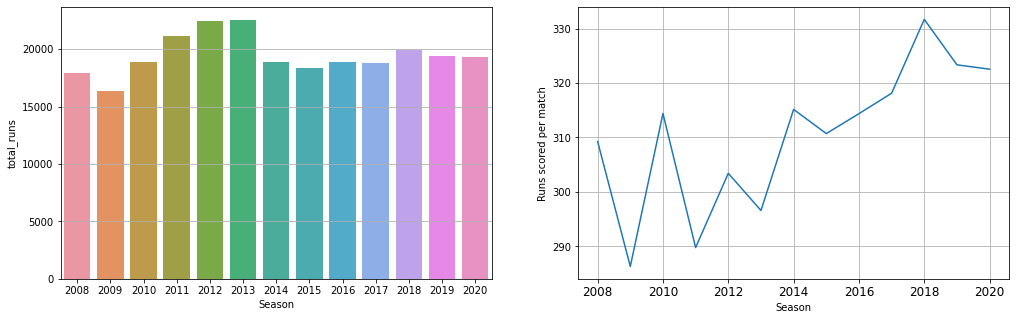

In [34]:
# total run scored in each reason. total season Run = sr
# avg run per season. average runs = ars
# mps = matches per season

sr = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
ars= pd.concat([mps,sr.iloc[:,1]],axis=1)
ars['Runs scored per match']=ars['total_runs']/ars['matches']
ars.set_index('Season',inplace=True)

# Sub plot in sns

f, axes = plt.subplots(1, 2)
f.set_size_inches(17, 5)
axes[0].grid(True)
axes[1].grid(True)
plt.xticks(fontsize=12)
sns.barplot(x=ars.index,y=ars['total_runs'], data= ars, ax=axes[0]);
sns.lineplot(x=ars.index,y=ars['Runs scored per match'], data= ars, ax=axes[1]);


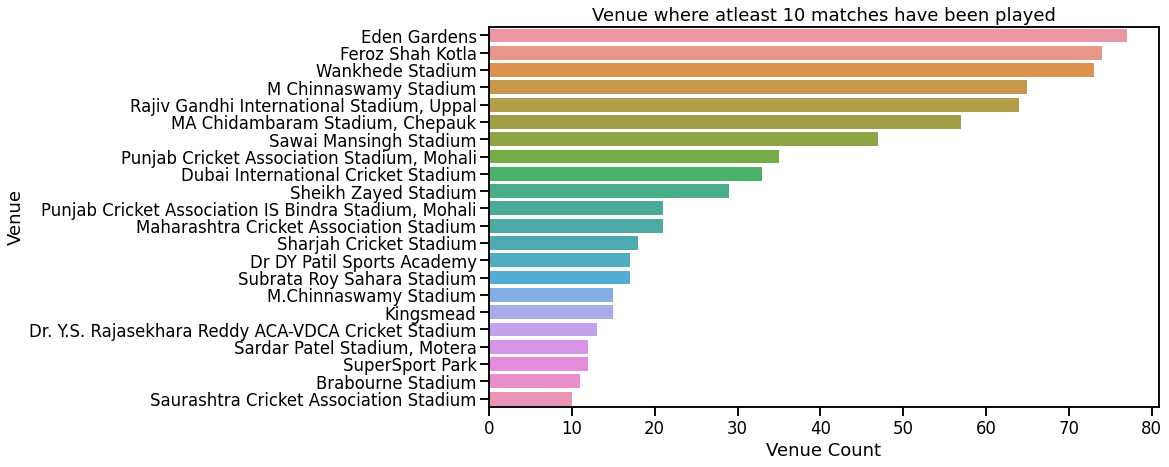

In [35]:
# venue where atleast 10 mathces have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=matches['venue'].value_counts().head(22).values,
           y=matches['venue'].value_counts().head(22).index,
           data=matches)

plt.title('Venue where atleast 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

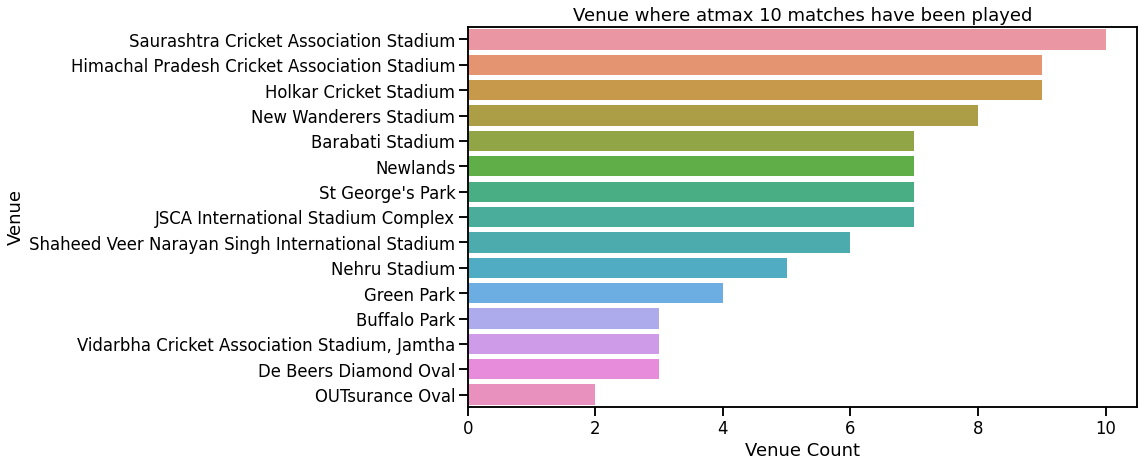

In [38]:
# Venue where atmax 10 matches have been played

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=matches['venue'].value_counts().tail(15).values,
           y=matches['venue'].value_counts().tail(15).index,
           data=matches)

plt.title('Venue where atmax 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

In [39]:
# Which stadium is best for winning by wickets i.e. team fielding first won the match
matches.venue[matches.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [40]:
# Which stadium is best for winning by runs i.e. bat first won the match
matches.venue[matches.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

### Which stadium is best for team when they win the toss

- Principle code
match.venue[match.toss_winner == 'Kolkata Knight Riders'][match.winner=='Kolkata Knight Riders'].mode()

- Mode : The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all. Other popular measures of central tendency include the mean, or the average of a set, and the median, the middle value in a set.
Refer **List and Dir function** Dir function to check the attributes of an object.

- Try

a= match.venue[match.toss_winner == 'Kolkata Knight Riders'][match.winner=='Kolkata Knight Riders'].mode()

In [43]:
# Which stadium is best for team when they win the toss

# Create a list containing complete team name
t= matches['team1'].unique()
for i in t:
    venues= matches.venue[matches.toss_winner == i][matches.winner==i].mode()
    for venue in venues:
        print(venue +' is best for '+ i + ' if they won the toss')
        #print()
    print()

M Chinnaswamy Stadium is best for Royal Challengers Bangalore if they won the toss

Punjab Cricket Association Stadium, Mohali is best for Kings XI Punjab if they won the toss

Feroz Shah Kotla is best for Delhi Daredevils if they won the toss

Wankhede Stadium is best for Mumbai Indians if they won the toss

Eden Gardens is best for Kolkata Knight Riders if they won the toss

Sawai Mansingh Stadium is best for Rajasthan Royals if they won the toss

Barabati Stadium is best for Deccan Chargers if they won the toss
Dr DY Patil Sports Academy is best for Deccan Chargers if they won the toss
Feroz Shah Kotla is best for Deccan Chargers if they won the toss
Kingsmead is best for Deccan Chargers if they won the toss
MA Chidambaram Stadium, Chepauk is best for Deccan Chargers if they won the toss
SuperSport Park is best for Deccan Chargers if they won the toss

MA Chidambaram Stadium, Chepauk is best for Chennai Super Kings if they won the toss

Feroz Shah Kotla is best for Kochi Tuskers Ker

In [45]:
# Which is the best chasing team
matches.winner[matches.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [46]:
# Which Team won the most no of matches batting 1st
matches.winner[matches.result=='runs'].mode()

0    Mumbai Indians
dtype: object

In [47]:
matches['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

# Analysis about Toss

In [50]:
# Toss Decisions
teams = matches['toss_winner'].unique()
# teams
decision_making = pd.DataFrame([], columns=['Toss Winner', 'Decision','Times'])

for id, element in enumerate(teams):
    temp_bat = matches[(matches['toss_winner']==element)&(matches['toss_decision']=='bat')]
    temp_field = matches[(matches['toss_winner']==element)&(matches['toss_decision']=='field')]
    
    # append decision making
    decision_making = decision_making.append({'Toss Winner':element, 'Decision':'bat', 'Times':temp_bat['toss_winner'].count()},ignore_index=True)
    
    # For field
    decision_making = decision_making.append({'Toss Winner':element, 'Decision':'field', 'Times':temp_field['toss_winner'].count()},ignore_index=True)

In [51]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Toss fig 1


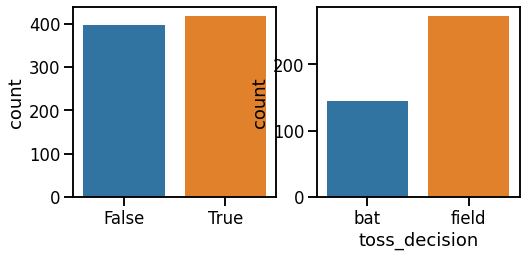

In [55]:
# Toss won vs match won
toss= matches['toss_winner']==matches['winner']
# who won more, 1 who choose batting or the one who choose fielding
decision= matches.toss_decision[matches.toss_winner==matches.winner]

print('Toss fig 1')
f, ax =  plt.subplots(1,2,figsize=(8,3.5))
sns.countplot(decision ,ax=ax[1])
sns.countplot(toss,ax=ax[0])
plt.show()

Toss fig 2


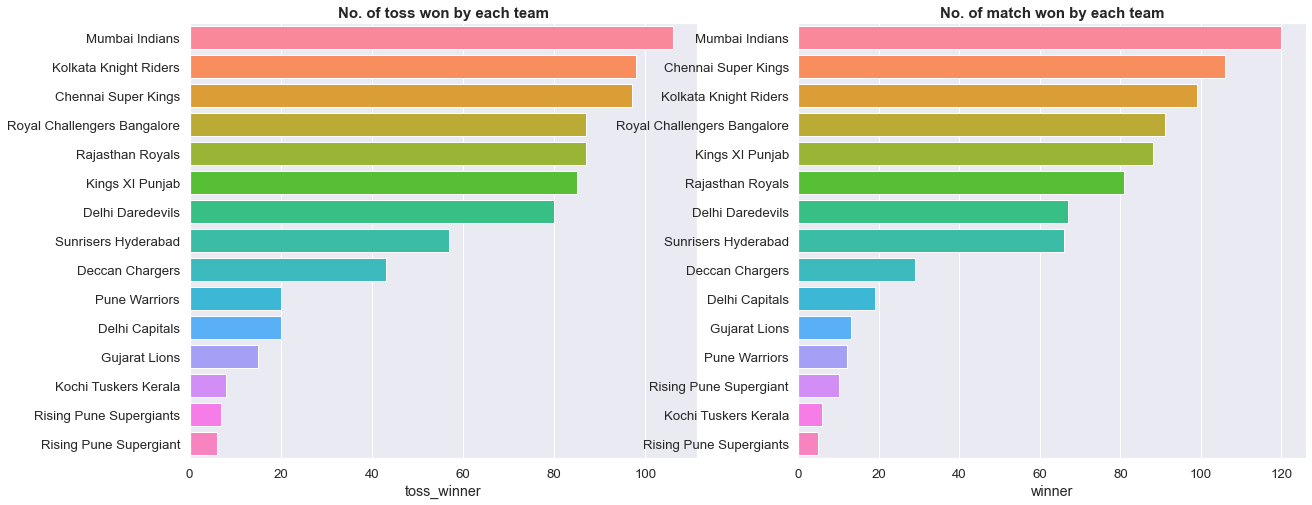

In [61]:
# Tosses won by each team &
toss= matches['toss_winner'].value_counts()
# sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')

# No of match won by each team
win=matches.winner.value_counts()

print('Toss fig 2')

f, ax =  plt.subplots(1,2,figsize=(20,8))

sns.set(font_scale=1.2)  # to resize x & y ticks just remember its scale not size
sns.barplot(y=toss.index, x= toss, orient = 'h', saturation=1, ax=ax[0])
ax[0].set_title('No. of toss won by each team', fontweight='bold', fontsize=15 )
sns.barplot(y=win.index, x= win, orient = 'h', saturation=1, ax=ax[1])
ax[1].set_title('No. of match won by each team', fontweight='bold', fontsize=15 )
# plt.yticks(fontsize=12)
plt.show()

Toss fig 3


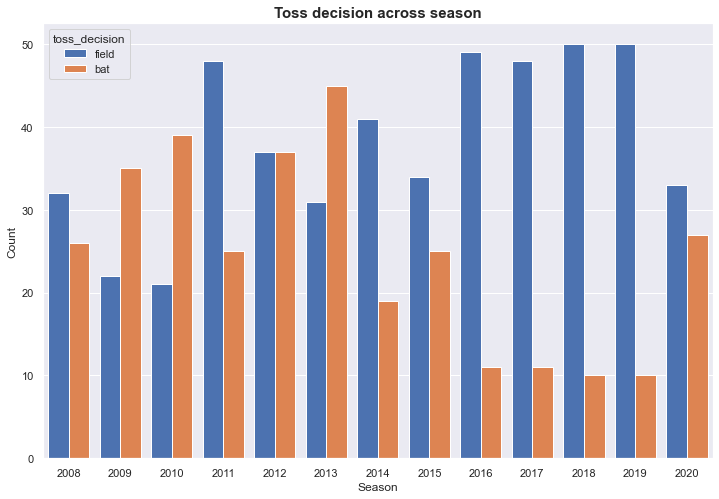

In [63]:
print('Toss fig 3')
ax= plt.axes()
sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')
ax.set_title('Toss decision across season', fontsize=15, fontweight='bold')
sns.countplot(x='Season', hue='toss_decision' ,data = matches, saturation=1)
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

# Conclusion of Analysis of Toss

1. fig1 : there is very slight edge to toss winning team. Plus we also observe that team who won toss and choose to field have more chance of winning the match.

2. fig2 : So does it mean winning the toss is directly proportional to winning the match as both graph seems correlated?

- Ans : No,  see the previous graph we can see the exact relationship between match won and toss won. It certainly gives edge but very minor edge.

3. fig3 : There is a trend seen in matches between 2016-2019 where team prefer to choose fielding rather than batting. How ever in 2020 this trend seem to fade.

# Player Analysis

In [69]:
# Player winning the man of the match maximum number of times
man_of_the_match = matches.player_of_match.value_counts()
man_of_the_match.columns = ['Batsman', 'Man of Match']
mom = man_of_the_match.reset_index()
mom

,index,player_of_match
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
...,...,...
228,S Anirudha,1
229,M Kartik,1
230,R McLaren,1
231,RJ Harris,1


In [73]:
# Arrange batsman as per total runs in IPL
runs= byb.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns =['Batsman','Total run']
runs.sort_values('Total run', ascending=False, inplace=True)
runs.reset_index(inplace=True)
runs.drop('index',axis=1, inplace=True)
print(runs.head(10))
print()
print("Man of the Match")
print()
print(mom.head(10))

          Batsman  Total run
0         V Kohli       5878
1        SK Raina       5368
2       DA Warner       5254
3       RG Sharma       5230
4        S Dhawan       5197
5  AB de Villiers       4849
6        CH Gayle       4772
7        MS Dhoni       4632
8      RV Uthappa       4607
9       G Gambhir       4217

Man of the Match

            index  player_of_match
0  AB de Villiers               23
1        CH Gayle               22
2       RG Sharma               18
3       DA Warner               17
4        MS Dhoni               17
5       SR Watson               16
6       YK Pathan               16
7        SK Raina               14
8         V Kohli               13
9       G Gambhir               13


In [74]:
# store top 10 players as per total run they score in list
players_name = runs['Batsman'].head(10).to_list()

In [75]:
players_name

['V Kohli',
 'SK Raina',
 'DA Warner',
 'RG Sharma',
 'S Dhawan',
 'AB de Villiers',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'G Gambhir']

# Let's check dismissal of top 10 batsman

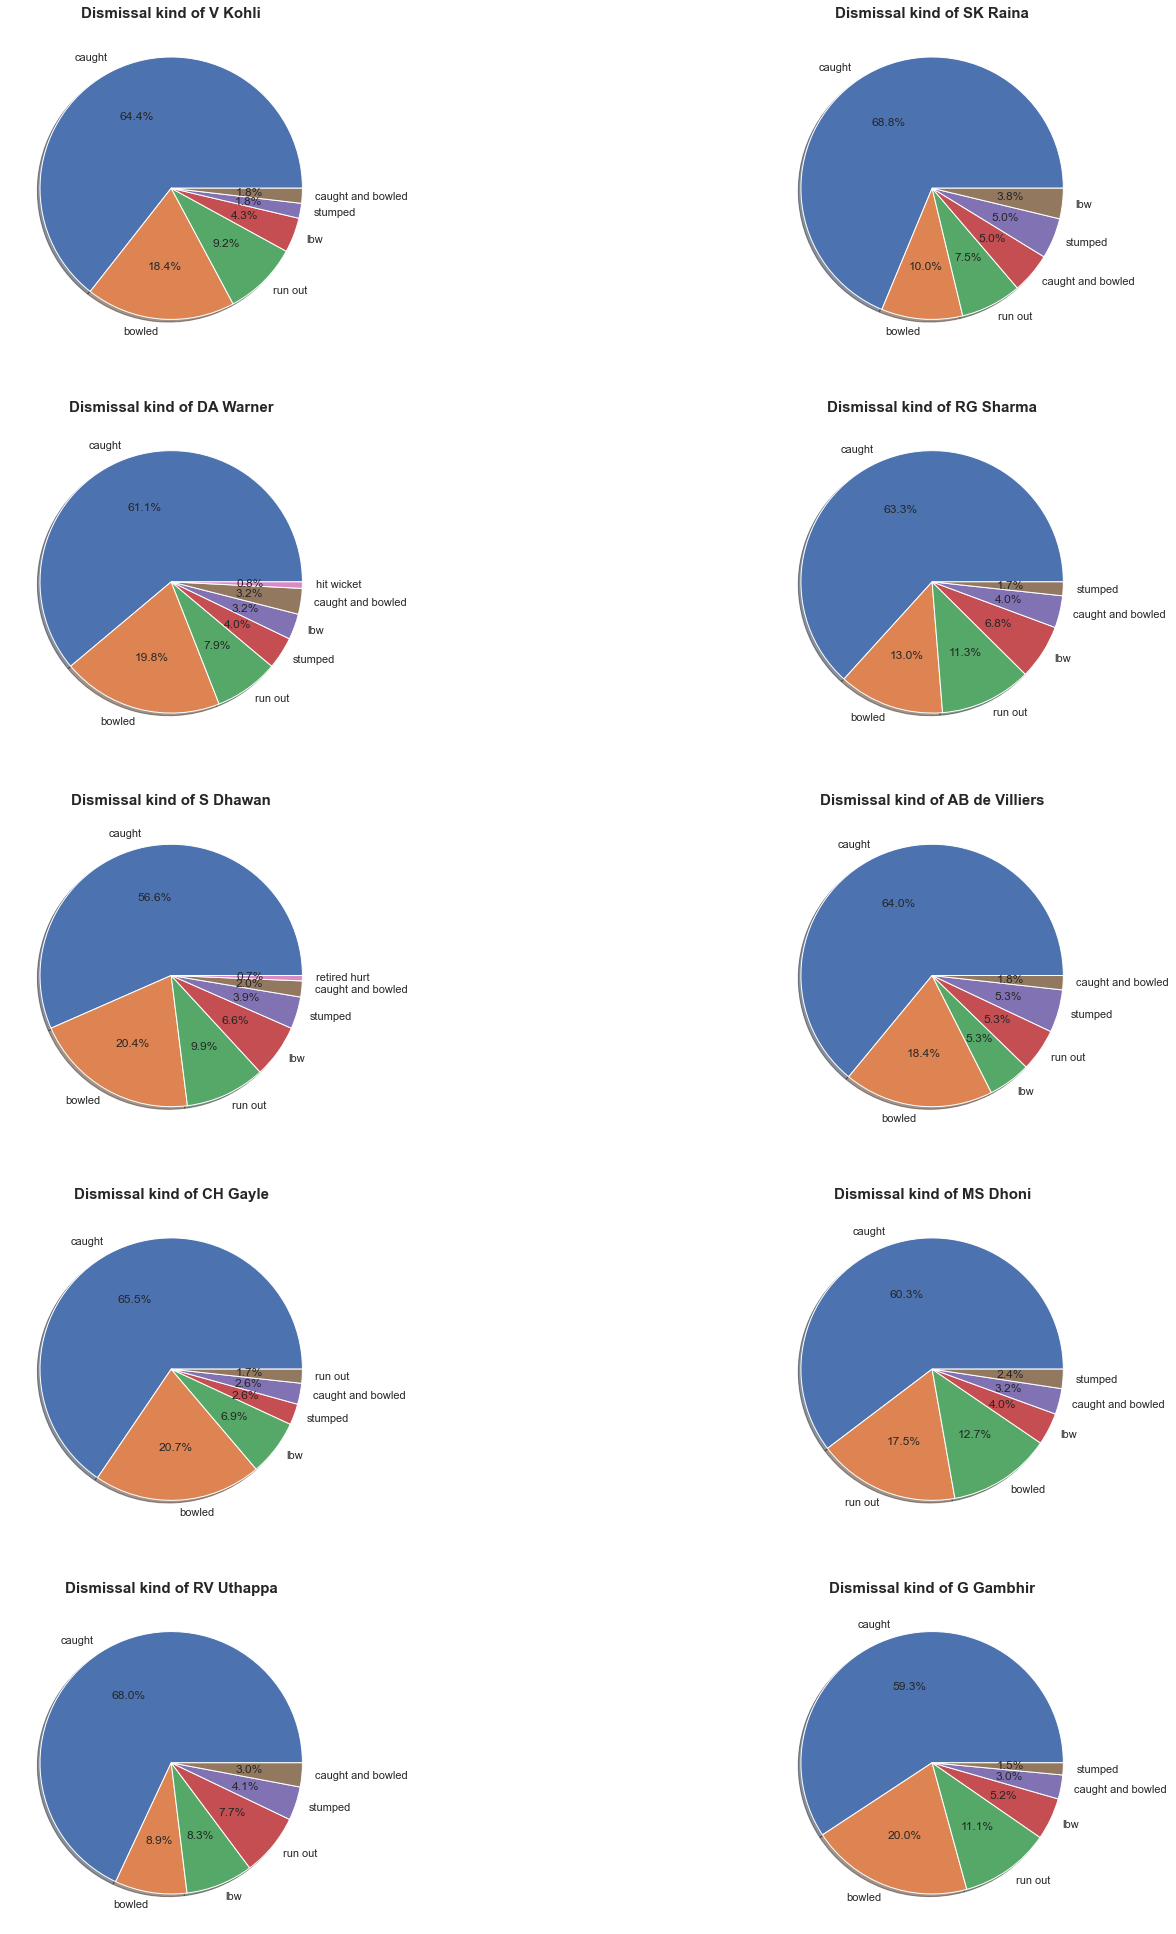

In [78]:
f,  ax = plt.subplots(5,2, figsize=(25,35))

ax = ax.flatten()

j = 0
for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    current_player['dismissal_kind'].value_counts().plot.pie(ax=ax[j], autopct='%1.1f%%', shadow=True, rotatelabels=False)
    ax[j].set_title('Dismissal kind of '+i, fontweight='bold', fontsize=15)
    ax[j].set_ylabel('')
    ax[j].set_xlabel('')
    j=j+1

### Calculate dismissal of MS Dhoni

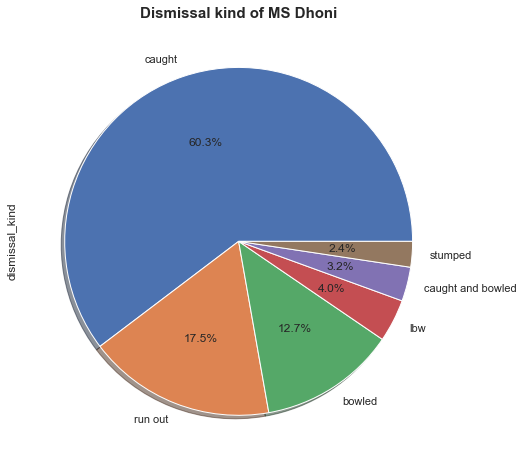

In [80]:
a= 'MS Dhoni'
player = (byb['batsman']=='MS Dhoni') 
df_dhoni=byb[player]
df_dhoni['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=False) 
plt.title('Dismissal kind of '+ a, fontweight= 'bold', fontsize=15) 
plt.show()

## Count 1s, 2s, 3s, 4s, 6s for each player from top 10

In [89]:
for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    def count(current_player, runs):
        return len(current_player[current_player['batsman_runs']==runs])*runs
    print('Score distribution of '+i + ":")
    print('Runs scored from 1s :', count(current_player,1), '     And no of 1s = ',count(current_player,1)/1)
    print('Runs scored from 2s :', count(current_player,2), '      And no of 2s = ',count(current_player,2)/2)
    print('Runs scored from 3s :', count(current_player,3), '       And no of 3s = ',count(current_player,3)/3)
    print('Runs scored from 4s :', count(current_player,4), '     And no of 4s = ',count(current_player,4)/4)
    print('Runs scored from 6s :', count(current_player,6), '     And no of 6s = ',count(current_player,6)/6)
    print()

Score distribution of V Kohli:
Runs scored from 1s : 1919      And no of 1s =  1919.0
Runs scored from 2s : 692       And no of 2s =  346.0
Runs scored from 3s : 39        And no of 3s =  13.0
Runs scored from 4s : 2016      And no of 4s =  504.0
Runs scored from 6s : 1212      And no of 6s =  202.0

Score distribution of SK Raina:
Runs scored from 1s : 1666      And no of 1s =  1666.0
Runs scored from 2s : 528       And no of 2s =  264.0
Runs scored from 3s : 33        And no of 3s =  11.0
Runs scored from 4s : 1972      And no of 4s =  493.0
Runs scored from 6s : 1164      And no of 6s =  194.0

Score distribution of DA Warner:
Runs scored from 1s : 1348      And no of 1s =  1348.0
Runs scored from 2s : 634       And no of 2s =  317.0
Runs scored from 3s : 57        And no of 3s =  19.0
Runs scored from 4s : 2040      And no of 4s =  510.0
Runs scored from 6s : 1170      And no of 6s =  195.0

Score distribution of RG Sharma:
Runs scored from 1s : 1663      And no of 1s =  1663.0
Run

From above result we can say that **Shikhar Dhawan** has most number of 4s and **Chris Gayle** has most number of sixes

# Done with this task